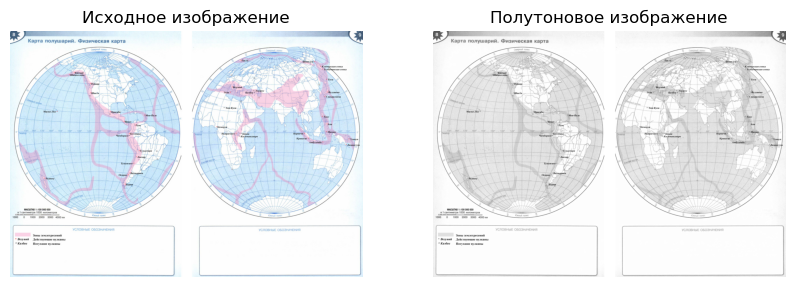

In [23]:
# 1
from PIL import Image
import matplotlib.pyplot as plt
def f(im,out):
    image = Image.open(im).convert("RGB")
    pixels = image.load()

    width, height = image.size
    gray_image = Image.new("L", (width, height))
    gray_pixels = gray_image.load()

    for y in range(height):
        for x in range(width):
            r, g, b = pixels[x, y]
            brightness = int(0.299 * r + 0.587 * g + 0.114 * b)
            gray_pixels[x, y] = brightness

    plt.figure(figsize=(10, 5))

    # Исходное изображение
    plt.subplot(1, 2, 1)
    plt.title("Исходное изображение")
    plt.imshow(image)
    plt.axis('off')

    # Полутоновое изображение
    plt.subplot(1, 2, 2)
    plt.title("Полутоновое изображение")
    plt.imshow(gray_image, cmap='gray')
    plt.axis('off')

    gray_image.save(out)

    plt.show()

f("image2.png","output_gray2.bmp")

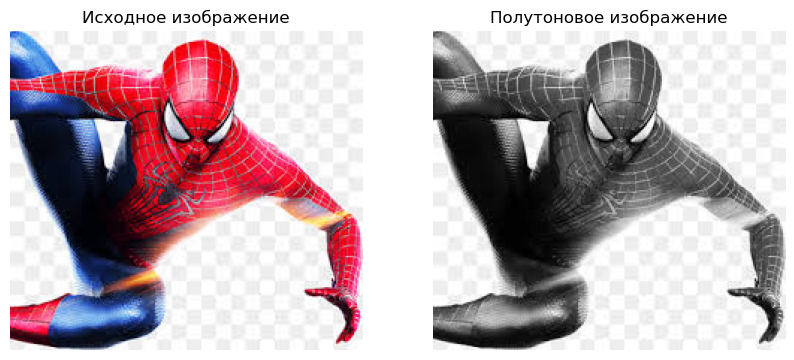

In [25]:
f("image1.png","output_gray1.bmp")

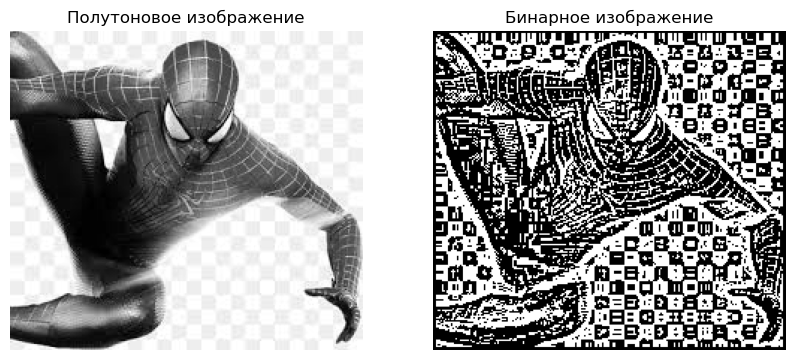

In [35]:
def binarize_bernsen(image, window_size=5):
    pixels = image.load()
    width, height = image.size
    binary_image = Image.new("1", (width, height))
    binary_pixels = binary_image.load()

    half_window = window_size // 2

    for y in range(half_window, height - half_window):
        for x in range(half_window, width - half_window):
            window = [
                pixels[dx, dy]
                for dy in range(y - half_window, y + half_window + 1)
                for dx in range(x - half_window, x + half_window + 1)
            ]
            min_val = min(window)
            max_val = max(window)
            threshold = (min_val + max_val) // 2

            binary_pixels[x, y] = 255 if pixels[x, y] > threshold else 0

    return binary_image

gray_image1 = Image.open("output_gray1.bmp")
gray_image2 = Image.open("output_gray2.bmp")

binary_image1 = binarize_bernsen(gray_image1)
binary_image2 = binarize_bernsen(gray_image2)

plt.figure(figsize=(10, 5))

# Полутоновое изображение
plt.subplot(1, 2, 1)
plt.title("Полутоновое изображение")
plt.imshow(gray_image1, cmap='gray')
plt.axis('off')

# Бинарное изображение
plt.subplot(1, 2, 2)
plt.title("Бинарное изображение")
plt.imshow(binary_image1, cmap='gray')
plt.axis('off')

plt.show()

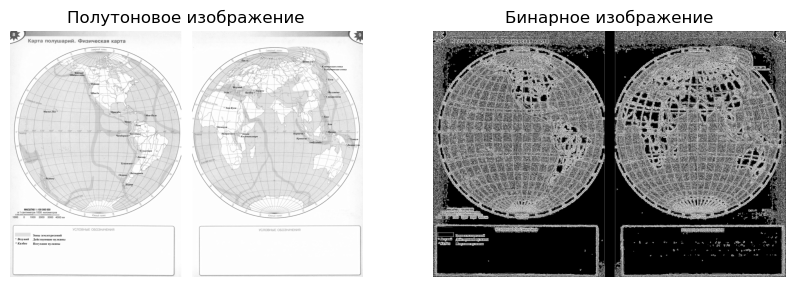

In [37]:
plt.figure(figsize=(10, 5))

# Полутоновое изображение
plt.subplot(1, 2, 1)
plt.title("Полутоновое изображение")
plt.imshow(gray_image2, cmap='gray')
plt.axis('off')

# Бинарное изображение
plt.subplot(1, 2, 2)
plt.title("Бинарное изображение")
plt.imshow(binary_image2, cmap='gray')
plt.axis('off')

plt.show()

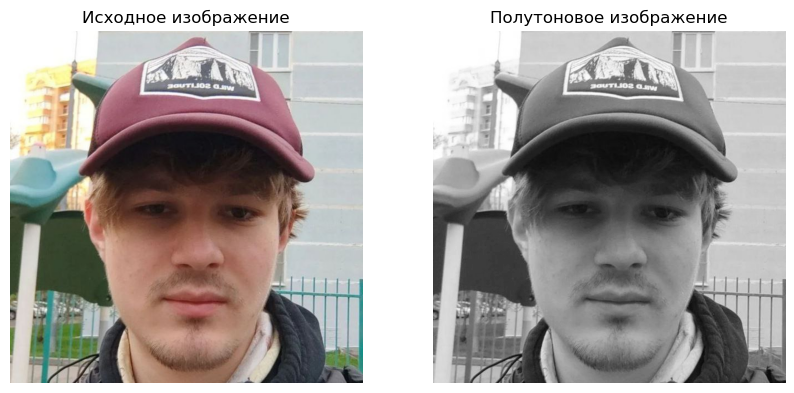

In [41]:
f("image3.png","output_gray3.bmp")